<a href="https://colab.research.google.com/github/anuradha-datascience/NLP/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boat Products Review - Mobile Accessories

Description of Data:



 Summary — text of the review



Perform EDA and necessary pre-processing steps in dataset.

(2 Mark)
Using the LDA algorithm create the Topics (Min 10) for the Corpus
 (2 Mark)
NOTE: Use Summary Column

Compute the coherence score and print Topics Extract
ed. (2 Mark)
Visualize the to
pics (1 Mark)
Plot the dependency parser for any two random sentences from the entire
corpus/dataset that has at least 10 words in the sentence. Make sure hat dependency

parser looks good and should visually understandable. (3 Mark)andable. (3 Mark)andable. (3 Mark)

## IMPORT LIBRARIES

In [ ]:
# data wrangling

import re
import string
import pandas as pd
import numpy as np
import spacy

# data visualization

import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis
import pyLDAvis.gensim

# text modelling

import nltk
from nltk.corpus import stopwords
import en_core_web_sm
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
import random
# filter warning

import warnings
warnings.filterwarnings('ignore')

**1. Perform EDA and necessary pre-processing steps in dataset.**

In [ ]:
# load data

df = pd.read_csv("Mobile Accessories.csv",encoding = 'latin')

In [ ]:
# show top 5
df.head()

,ProductName,ProductPrice,Discount,NumberofReviews,Rate,Review,Summary
0,Mask,\nSale priceâ¹ 499,17% off,147 reviews,â \n 4.9\n,Excellent!!,One of the most comfortable masks available in...
1,Mask,\nSale priceâ¹ 499,17% off,147 reviews,â \n 4.9\n,Good mask,Quality is good and good to use . size is for ...
2,Mask,\nSale priceâ¹ 499,17% off,147 reviews,â \n 4.9\n,The best in range,Super bass with very good spec.... amazing ne...
3,Mask,\nSale priceâ¹ 499,17% off,147 reviews,â \n 4.9\n,Excellent Product,Top notch product amongst other items in the m...
4,Mask,\nSale priceâ¹ 499,17% off,147 reviews,â \n 4.9\n,Excellent product,Very comfortable..


In [ ]:
# check info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ProductName      118 non-null    object
 1   ProductPrice     118 non-null    object
 2   Discount         118 non-null    object
 3   NumberofReviews  118 non-null    object
 4   Rate             118 non-null    object
 5   Review           75 non-null     object
 6   Summary          118 non-null    object
dtypes: object(7)
memory usage: 6.6+ KB


In [ ]:

df.Summary.apply(len).describe()

count    118.000000
mean      48.838983
std       67.916612
min        4.000000
25%       14.000000
50%       29.000000
75%       54.750000
max      470.000000
Name: Summary, dtype: float64

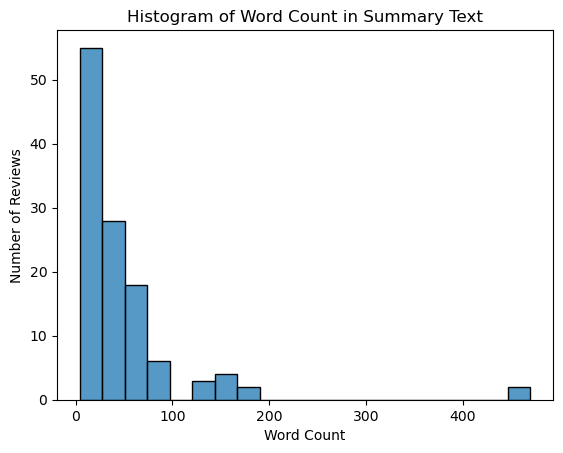

In [ ]:
# Tokenize the summary text and count the number of words
# Plot histogram using Seaborn
sns.histplot(df.Summary.apply(len), bins=20, kde=False)
plt.xlabel('Word Count')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Word Count in Summary Text')
plt.show()

In [ ]:
#Longest review
import warnings
import textwrap

max_length_index = df['Summary'].apply(len).idxmax()
max_length_text = df.loc[max_length_index, 'Summary']
wrapped_text = textwrap.wrap(max_length_text, width=150)
print(wrapped_text)
print(len(max_length_text))

["I bought this cable on 3 july 2021, received in 2-3 days for my Samsung Galaxy note 10 lite. My original cable's length is 0.9m and i needed a long", "cable. Samsung doesn't offer long cable type C-type C besides 0.9m. Oneplus type C- type C costs 800/- for 1m. This is cable is better than any other", 'cables in the market. It supports 100W output and hence it charges my cell phone at full power, you can even charger laptop with this cable. Box', 'packaging is pretty simple.']
470


Max para is just around 3 lines . We can see numerical values(dates and numbers), punctuation, capitalization, contractions(like doesn't), stopwords, and also domain-specific abbreviations(like  type C) or special characters(/-) .We need o ensure the text is cleaned and standardized for further analysis or modeling.

In [ ]:
# check for null values

df.isna().sum()

ProductName         0
ProductPrice        0
Discount            0
NumberofReviews     0
Rate                0
Review             43
Summary             0
dtype: int64

## PREPROCESSING

In [ ]:
#replace null value with empty string
df['Review']=df['Review'].fillna("")

In [ ]:
df.isna().sum()

ProductName        0
ProductPrice       0
Discount           0
NumberofReviews    0
Rate               0
Review             0
Summary            0
dtype: int64

In [ ]:
# check info after dropping null

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ProductName      118 non-null    object
 1   ProductPrice     118 non-null    object
 2   Discount         118 non-null    object
 3   NumberofReviews  118 non-null    object
 4   Rate             118 non-null    object
 5   Review           118 non-null    object
 6   Summary          118 non-null    object
dtypes: object(7)
memory usage: 6.6+ KB


In [ ]:
#sanity check
df.head()

,ProductName,ProductPrice,Discount,NumberofReviews,Rate,Review,Summary
0,Mask,\nSale priceâ¹ 499,17% off,147 reviews,â \n 4.9\n,Excellent!!,One of the most comfortable masks available in...
1,Mask,\nSale priceâ¹ 499,17% off,147 reviews,â \n 4.9\n,Good mask,Quality is good and good to use . size is for ...
2,Mask,\nSale priceâ¹ 499,17% off,147 reviews,â \n 4.9\n,The best in range,Super bass with very good spec.... amazing ne...
3,Mask,\nSale priceâ¹ 499,17% off,147 reviews,â \n 4.9\n,Excellent Product,Top notch product amongst other items in the m...
4,Mask,\nSale priceâ¹ 499,17% off,147 reviews,â \n 4.9\n,Excellent product,Very comfortable..


In [ ]:
# download the stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agaan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# create function for case folding

def case_fold(text ):
    delete_dict = {sp_character: '' for sp_character in string.punctuation}
    delete_dict[' '] = ' '
    table = str.maketrans(delete_dict)
    text = text.translate(table)
    textArr= text.split()
    text_clean = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))])

    return text_clean.lower()

In [ ]:
# apply casefolding and create number words feature

df['Summary'] = df['Summary'].apply(case_fold)
df['Num_words_text'] = df['Summary'].apply(lambda x:len(str(x).split()))
df.head()

,ProductName,ProductPrice,Discount,NumberofReviews,Rate,Review,Summary,Num_words_text
0,Mask,\nSale priceâ¹ 499,17% off,147 reviews,â \n 4.9\n,Excellent!!,most comfortable masks available market well d...,18
1,Mask,\nSale priceâ¹ 499,17% off,147 reviews,â \n 4.9\n,Good mask,quality good good size person with very face p...,13
2,Mask,\nSale priceâ¹ 499,17% off,147 reviews,â \n 4.9\n,The best in range,super bass with very good spec amazing neckband,8
3,Mask,\nSale priceâ¹ 499,17% off,147 reviews,â \n 4.9\n,Excellent Product,notch product amongst other items market milit...,10
4,Mask,\nSale priceâ¹ 499,17% off,147 reviews,â \n 4.9\n,Excellent product,very comfortable,2


Before going further, let's filter the data first so that the process might not take a long training time.

In [ ]:
# filter the short reviews only

max_review_data_sentence_length = df['Num_words_text'].max()
print(max_review_data_sentence_length)


53


Reviews are already short and datset is quite small , we will consider alll the reviews in topic modelling

Here the dataset is quite small in size , we will not do further filtering

In [ ]:
# function to remove stopwords

def remove_stopwords(text):
    textArr = text.split(' ')
    stop_clean = " ".join([i for i in textArr if i not in stop_words])
    return stop_clean

In [ ]:
# remove stopwords from the cleaned text

stop_words = stopwords.words('english')

df['Text'] = df['Summary'].apply(remove_stopwords)

In [ ]:
# load spacymodel for lemmatization
nlp = en_core_web_sm.load(disable=['parser', 'ner'])

# Function to lemmatize text
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ']):
    for sent in texts:
        doc = nlp(sent)
        yield [token.lemma_ for token in doc if token.pos_ in allowed_postags]

# Apply lemmatization
text_list = df['Summary'].tolist()
tokenized_reviews = list(lemmatization(text_list))

In [ ]:
# before lemma

print(text_list[29])

bought this cable july received days samsung galaxy note lite original cables length needed long cable samsung doesnt offer long cable type ctype besides oneplus type type costs this cable better than other cables market supports 100w output hence charges cell phone full power even charger laptop with this cable packaging pretty simple


In [ ]:
# after lemma

print(tokenized_reviews[29])

['cable', 'day', 'note', 'lite', 'original', 'cable', 'length', 'long', 'cable', 'long', 'cable', 'type', 'ctype', 'oneplus', 'type', 'type', 'cost', 'cable', 'other', 'cable', 'market', 'output', 'cell', 'phone', 'full', 'power', 'charger', 'laptop', 'cable', 'simple']


In [ ]:
df.head()

,ProductName,ProductPrice,Discount,NumberofReviews,Rate,Review,Summary,Num_words_text,Text
0,Mask,\nSale priceâ¹ 499,17% off,147 reviews,â \n 4.9\n,Excellent!!,most comfortable masks available market well d...,18,comfortable masks available market well design...
1,Mask,\nSale priceâ¹ 499,17% off,147 reviews,â \n 4.9\n,Good mask,quality good good size person with very face p...,13,quality good good size person face people larg...
2,Mask,\nSale priceâ¹ 499,17% off,147 reviews,â \n 4.9\n,The best in range,super bass with very good spec amazing neckband,8,super bass good spec amazing neckband
3,Mask,\nSale priceâ¹ 499,17% off,147 reviews,â \n 4.9\n,Excellent Product,notch product amongst other items market milit...,10,notch product amongst items market military st...
4,Mask,\nSale priceâ¹ 499,17% off,147 reviews,â \n 4.9\n,Excellent product,very comfortable,2,comfortable


## MODELLING

Now we will create vocabulary dictionary and document term matrix.

In [ ]:
# create dict and document matrix

dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

**2. Using the LDA algorithm create the Topics (Min 10) for the Corpus**

In [ ]:
# Creating the object for LDA model using gensim library

LDA = gensim.models.ldamodel.LdaModel

In [ ]:
# Build LDA model

lda_model = LDA(corpus = doc_term_matrix, id2word = dictionary, num_topics = 10,
                random_state = 100, chunksize = 100, passes = 20)

**3. Compute the coherence score and print Topics Extracted. (2 Mark)**


In [ ]:
# coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4931249994729397


In [ ]:
# print topics

lda_model.print_topics()

[(0,
  '0.134*"perfect" + 0.008*"product" + 0.008*"meter" + 0.008*"nice" + 0.008*"size" + 0.008*"good" + 0.008*"boat" + 0.008*"people" + 0.008*"quality" + 0.008*"person"'),
 (1,
  '0.153*"charger" + 0.117*"rapid" + 0.117*"port" + 0.117*"dual" + 0.112*"qcpd" + 0.106*"boat" + 0.066*"cable" + 0.059*"amazing" + 0.038*"delivery" + 0.011*"charging"'),
 (2,
  '0.112*"description" + 0.112*"same" + 0.112*"website" + 0.112*"device" + 0.112*"performance" + 0.112*"satisfied" + 0.033*"choice" + 0.003*"other" + 0.003*"product" + 0.003*"awesome"'),
 (3,
  '0.233*"good" + 0.197*"product" + 0.124*"nice" + 0.091*"quality" + 0.087*"price" + 0.039*"design" + 0.012*"soft" + 0.012*"touch" + 0.012*"mask" + 0.012*"super"'),
 (4,
  '0.140*"product" + 0.109*"excellent" + 0.109*"brand" + 0.060*"year" + 0.060*"cable" + 0.049*"boat" + 0.037*"original" + 0.026*"phone" + 0.026*"initial" + 0.026*"durable"'),
 (5,
  '0.338*"good" + 0.171*"cable" + 0.085*"strong" + 0.052*"quality" + 0.038*"size" + 0.020*"large" + 0.020

## VISUALIZE THE TOPICS

**Visualize the topics (1 Mark)**


Perplexity is a measure of how good the model is, the lower the better.

In [ ]:
# print perplexity

print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))


Perplexity:  -3.9838958209781907


In [ ]:
# visualize topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.160776 -0.081265       1        1  20.832480
3     -0.317143  0.002761       2        1  17.148689
9     -0.179332 -0.174812       3        1  13.031233
5     -0.067647  0.060789       4        1  10.854101
8      0.109599  0.049963       5        1  10.454449
4     -0.022516 -0.073955       6        1  10.452951
1      0.188613 -0.211951       7        1   8.041903
7      0.046106  0.156626       8        1   4.118818
2      0.051405  0.193970       9        1   2.954679
0      0.030140  0.077874      10        1   2.110697, topic_info=        Term       Freq      Total Category  logprob  loglift
11      good  36.000000  36.000000  Default  30.0000  30.0000
25   product  39.000000  39.000000  Default  29.0000  29.0000
33     cable  43.000000  43.000000  Default  28.0000  28.0000
40      type  20.000000  20.000000  Default  27.0000  27.0000
42     datum  10.000000  10.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
7     option   0.081021   1.831156  Topic10  -4.8076   0.7402
8    pricing   0.081021   1.831156  Topic10  -4.8076   0.7402
18   amazing   0.081021   2.987874  Topic10  -4.8076   0.2505
22      item   0.081021   1.839797  Topic10  -4.8076   0.7354
23  military   0.081021   2.184506  Topic10  -4.8076   0.5637

[470 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
18        7  0.669372    amazing
32        1  0.473980      apple
0         2  0.373212  available
0         5  0.373212  available
41        8  0.448258    awesome
...     ...       ...        ...
40        6  0.048917       type
76        5  0.546105      value
17        4  0.577918       very
99        9  0.862253    website
50        6  0.818852       year

[128 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 4, 10, 6, 9, 5, 2, 8, 3, 1])

# Plot Dependency Parser

**Plot the dependency parser for any two random sentences from the entire corpus/dataset that has at least 10 words in the sentence.**

Make sure that dependency parser looks good and should visually understandable. (3 Mark)

In [ ]:
df1=pd.read_csv("Mobile Accessories.csv")
df1.head()

,ProductName,ProductPrice,Discount,NumberofReviews,Rate,Review,Summary
0,Mask,\nSale price₹ 499,17% off,147 reviews,★\n 4.9\n,Excellent!!,One of the most comfortable masks available in...
1,Mask,\nSale price₹ 499,17% off,147 reviews,★\n 4.9\n,Good mask,Quality is good and good to use . size is for ...
2,Mask,\nSale price₹ 499,17% off,147 reviews,★\n 4.9\n,The best in range,Super bass with very good spec.... amazing ne...
3,Mask,\nSale price₹ 499,17% off,147 reviews,★\n 4.9\n,Excellent Product,Top notch product amongst other items in the m...
4,Mask,\nSale price₹ 499,17% off,147 reviews,★\n 4.9\n,Excellent product,Very comfortable..


In [ ]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
sentence = "The quick brown fox jumping over the lazy dog"
doc = nlp(sentence)
print(f"{'Node (from)-->':<15} {'Relation':^10} {'-->Node (to)':>15}\n")
for token in doc:
    print("{:<15} {:^10} {:>15}".format(str(token.head.text), str(token.dep_), str(token.text)))
displacy.render(doc, style='dep')

Node (from)-->   Relation     -->Node (to)

fox                det                 The
fox                amod              quick
fox                amod              brown
jumping           nsubj                fox
jumping            ROOT            jumping
jumping            prep               over
dog                det                 the
dog                amod               lazy
over               pobj                dog


In [ ]:
import spacy
from spacy import displacy
import random
# from IPython.core.display import display, HTML
# from IPython.display import display, HTML

# # Load the English language model
# nlp = spacy.load("en_core_web_sm")

# df['Summary_tokens']=df['Summary'].apply(lambda x: word_tokenize(x))
# summary_list=df['Summary_tokens'].tolist()
# # print(summary_list[2:5])


# Select two random sentences with at least 10 words
random_sentences = [sentence for sentence in tokenized_reviews if len(sentence) >= 10]
selected_sentences = random.sample(random_sentences, 2)


# Combine tokenized sentences into strings
selected_sentences_texts = [' '.join(sentence) for sentence in selected_sentences]

# print(selected_sentences_texts)
print("random sentences are:")
print(selected_sentences_texts[0])
print(selected_sentences_texts[1])

# Dependency Parser for sentence 1
print("Dependency Parser for sentence 1")


tree1=nlp(selected_sentences_texts[0])



print(f"{'Node (from)-->':<15} {'Relation':^10} {'-->Node (to)':>15}\n")
for token in tree1:
    print("{:<15} {:^10} {:>15}".format(str(token.head.text), str(token.dep_), str(token.text)))

displacy.render(tree1, style="dep",jupyter=True)

tree2=nlp(selected_sentences_texts[1])

print("Dependency Parser for sentence 2")
print(f"{'Node (from)-->':<15} {'Relation':^10} {'-->Node (to)':>15}\n")
for token in tree2:
    print("{:<15} {:^10} {:>15}".format(str(token.head.text), str(token.dep_), str(token.text)))

displacy.render(tree2, style="dep",jupyter=True)

random sentences are:
cable day note lite original cable length long cable long cable type ctype oneplus type type cost cable other cable market output cell phone full power charger laptop cable simple
quality good good size person very face people large size clothe
Dependency Parser for sentence 1
Node (from)-->   Relation     -->Node (to)

day              compound            cable
note             compound              day
cable              nmod               note
cable              nmod               lite
length             amod           original
length           compound            cable
cable              nmod             length
cable              amod               long
type               nmod              cable
type               amod               long
type             compound            cable
type               nmod               type
oneplus          compound            ctype
type             compound          oneplus
type             compound             type
cost       

Dependency Parser for sentence 2
Node (from)-->   Relation     -->Node (to)

person             nmod            quality
person             amod               good
size               amod               good
person           compound             size
face              nsubj             person
face              advmod              very
face               ROOT               face
face              dative            people
clothe             amod              large
clothe           compound             size
face               dobj             clothe
